# FIGURE 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing
from msresist.figures.figure1 import plotClustergram, plotVarReplicates, plotReplicatesEndpoint, plotAveragedEndpoint, plotReplicatesFoldChangeEndpoint, plotVarReplicates, plotpca_explained, plotpca_ScoresLoadings_plotly
import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# 1. Phosphorylation Measurements

### A) PC9 AXL WT SAMPLES 

In [3]:
ABC_wt = preprocessing(AXLwt=True, motifs=True, Vfilter=False, FCfilter=False, log2T=True, mc_col=True)

In [4]:
ABC_wt[ABC_wt["Abbv"].str.contains("BRK1")]

Protein     Sequence UniprotAcc  Abbv Position       PC9  \
656  Protein BRICK1  ERRIEyIEARV     Q8WUW1  BRK1    Y63-p  0.462099   

          Erl      R428  Erl/R428   Erl+HGF   Erl+FGF   Erl+IGF   KO Erl  \
656  0.364768  0.394341  0.094436  0.384209  0.320779  0.275079  0.29606   

      KO R428  KO Erl/R428  
656  0.281909     0.304923

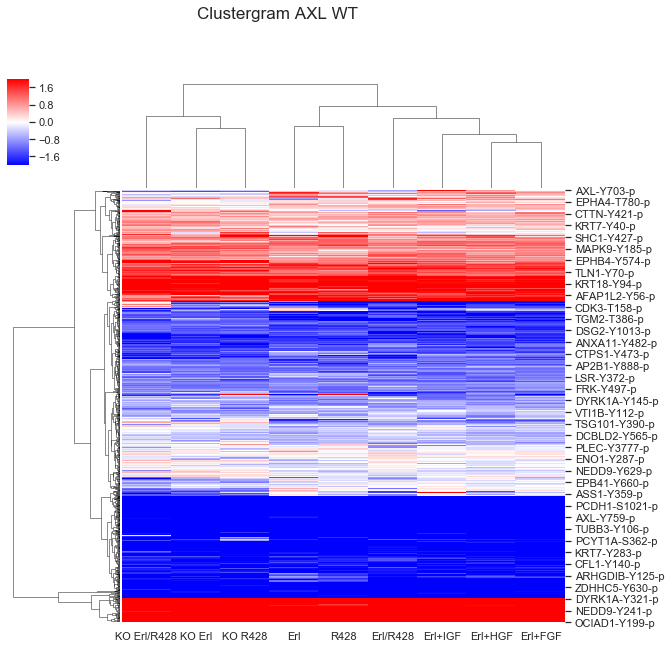

In [5]:
data_wt = pd.concat([ABC_wt.iloc[:, 3:5], ABC_wt.iloc[:, 6:]], axis=1).set_index(["Abbv", "Position"])
plotClustergram(data_wt, "Clustergram AXL WT", 2)

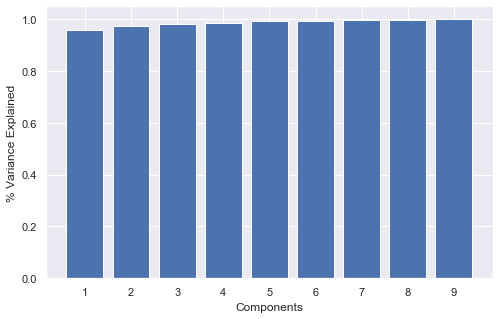

In [6]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, data_wt, data_wt.shape[1])

In [7]:
plotpca_ScoresLoadings_plotly(data_wt.T, "PC9 cells +Erlotinib", "EGFR")

               PC1       PC2
Position                    
Y1197-p  -0.026380  0.223567
Y1172-p   0.026190  0.136956
T1131-p   0.001020  0.245168
Y978-p   -0.012939  0.108545
Y1069-p   0.024825  0.243262
Y1110-p  -0.008796  0.110094


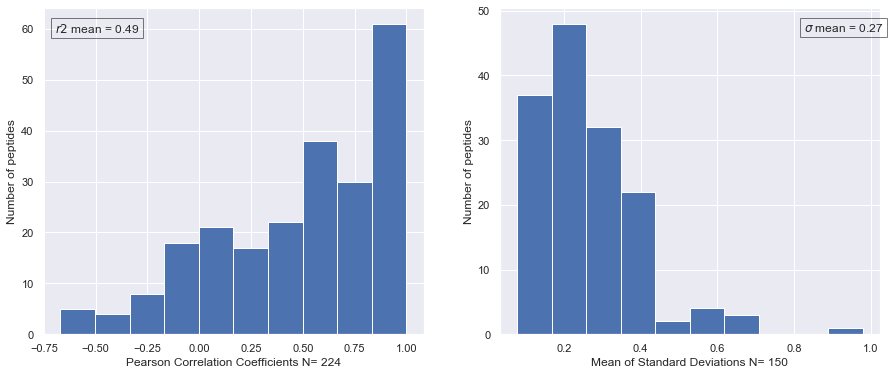

In [8]:
ABCwt_raw = preprocessing(AXLwt=True, rawdata=True, mc_row=True)

fig, ax = plt.subplots(1, 2, figsize=(15,6))
plotVarReplicates(ax, ABCwt_raw)

Variability of overlapping peptides across MS replicates. Pearson's correlation coefficient was computed for peptides overlapping across 2 MS replicates. For those overlapping 3 or more times, the Std was calculated.

### B) PC9 AXL MUTANTS TREATED WITH ERLOTINIB 

In [9]:
ABC_mutErl = preprocessing(Axlmuts_Erl=True, motifs=True, Vfilter=False, FCfilter=False, log2T=True, mc_row=True)

In [10]:
axl = ABC_mutErl[ABC_mutErl["Protein"].str.contains("UFO")]
axl.iloc[:, 5:] = pd.DataFrame(np.power(2, axl.iloc[:, 5:]))
axl

Protein     Sequence UniprotAcc Abbv  \
385  Tyrosine-protein kinase receptor UFO  ENSEIyDYLRQ     P30530  AXL   
386  Tyrosine-protein kinase receptor UFO  HPAGRyVLCPS     P30530  AXL   

    Position       PC9        KO        Kd        KI        M4        M5  \
385   Y759-p  0.982811  1.016565  0.666484  0.765542  2.736961  1.316157   
386   Y866-p  0.801057  0.356603  0.457404  1.032160  1.630611  1.056220   

           M7       M10       M11       M15  
385  1.125503  1.516056  0.377693  0.845003  
386  1.476095  1.153202  1.465176  1.726197

In [11]:
erk1 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("MAPK3")]
erk1.iloc[:, 5:] = pd.DataFrame(np.power(2, erk1.iloc[:, 5:]))
erk1

Protein     Sequence UniprotAcc   Abbv  \
234  Mitogen-activated protein kinase 3  GFLTEyVATRW     P27361  MAPK3   
235  Mitogen-activated protein kinase 3  GFLtEyVATRW     P27361  MAPK3   

    Position       PC9        KO        Kd        KI        M4        M5  \
234   Y204-p  1.533387  0.814639  1.045817  1.090909  1.794850  0.820077   
235   Y204-p  0.741912  1.060611  1.234432  0.881312  2.433843  0.798221   

           M7       M10       M11       M15  
234  0.822778  0.776035  1.010542  0.738818  
235  1.150605  1.009930  0.663469  0.779904

In [12]:
erk2 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("MAPK")]
erk2.iloc[:, 5:] = pd.DataFrame(np.power(2, erk2.iloc[:, 5:]))
erk2

Protein     Sequence UniprotAcc    Abbv  \
227   Mitogen-activated protein kinase 1  GFLTEyVATRW     P28482   MAPK1   
228   Mitogen-activated protein kinase 1  GFLtEyVATRW     P28482   MAPK1   
229  Mitogen-activated protein kinase 10  FMMTPyVVTRY     P53779  MAPK10   
230  Mitogen-activated protein kinase 10  FMMtPyVVTRY     P53779  MAPK10   
231  Mitogen-activated protein kinase 12  SEMTGyVVTRW     P53778  MAPK12   
232  Mitogen-activated protein kinase 13  AEMTGyVVTRW     O15264  MAPK13   
233  Mitogen-activated protein kinase 14  DEMTGyVATRW     Q16539  MAPK14   
234   Mitogen-activated protein kinase 3  GFLTEyVATRW     P27361   MAPK3   
235   Mitogen-activated protein kinase 3  GFLtEyVATRW     P27361   MAPK3   
236   Mitogen-activated protein kinase 7  YFMTEyVATRW     Q13164   MAPK7   
237   Mitogen-activated protein kinase 9  FMMTPyVVTRY     P45984   MAPK9   
238   Mitogen-activated protein kinase 9  FMMtPyVVTRY     P45984   MAPK9   

    Position       PC9        KO        Kd        KI        M4        M5  \
227   Y187-p  1.578102  0.665691  1.282639  1.074082  1.612998  0.689332   
228   Y187-p  0.668834  1.036502  1.105222  0.954368  2.282258  1.037119   
229   Y223-p  0.726966  0.888127  1.443418  0.770997  1.691184  0.844238   
230   Y223-p  0.836254  0.975160  0.901396  0.510787  2.660166  1.472221   
231   Y185-p  0.884145  0.820559  1.206120  0.832934  1.380226  0.954105   
232   Y182-p  0.921334  0.797418  1.407778  0.900193  1.328628  0.735920   
233   Y182-p  0.873475  0.690385  1.757188  0.893737  1.148276  0.757062   
234   Y204-p  1.533387  0.814639  1.045817  1.090909  1.794850  0.820077   
235   Y204-p  0.741912  1.060611  1.234432  0.881312  2.433843  0.798221   
236   Y221-p  1.097012  1.035106  0.964835  1.106926  2.267645  1.104553   
237   Y185-p  1.366774  1.347460  0.982849  0.433612  3.527511  0.863746   
238   Y185-p  0.850102  1.333112  0.854611  0.696772  2.066745  0.880975   

           M7       M10       M11       M15  
227  0.941304  0.719393  1.244531  0.737370  
228  1.190209  1.157767  0.602183  0.696273  
229  0.945533  0.983586  1.200569  0.873039  
230  0.932997  0.969019  0.916155  0.821045  
231  1.018070  0.916534  1.610852  0.693166  
232  1.002575  0.766913  1.923523  0.742732  
233  1.037033  0.751259  1.711754  0.910813  
234  0.822778  0.776035  1.010542  0.738818  
235  1.150605  1.009930  0.663469  0.779904  
236  1.016984  0.800875  0.695958  0.580776  
237  1.082380  0.858493  0.802030  0.561096  
238  1.050700  1.272524  0.897188  0.678461

In [13]:
erk2 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("MET")]
erk2.iloc[:, 5:] = pd.DataFrame(np.power(2, erk2.iloc[:, 5:]))
erk2

Protein     Sequence UniprotAcc Abbv Position  \
173  Hepatocyte growth factor receptor  KCVAPyPSLLS     P08581  MET  Y1365-p   
174  Hepatocyte growth factor receptor  NESVDyRATFP     P08581  MET  Y1003-p   

          PC9        KO        Kd        KI        M4        M5        M7  \
173  1.398765  0.847670  1.374145  0.484677  1.970380  0.954205  0.921355   
174  1.543317  0.889754  1.193971  0.814087  1.659713  0.810759  0.763653   

          M10       M11       M15  
173  0.877660  1.239653  0.671890  
174  0.860373  0.903968  0.937453

In [14]:
ABC_mutErl = pd.concat([ABC_mutErl.iloc[:, :12], ABC_mutErl.iloc[:, 14]], axis=1)

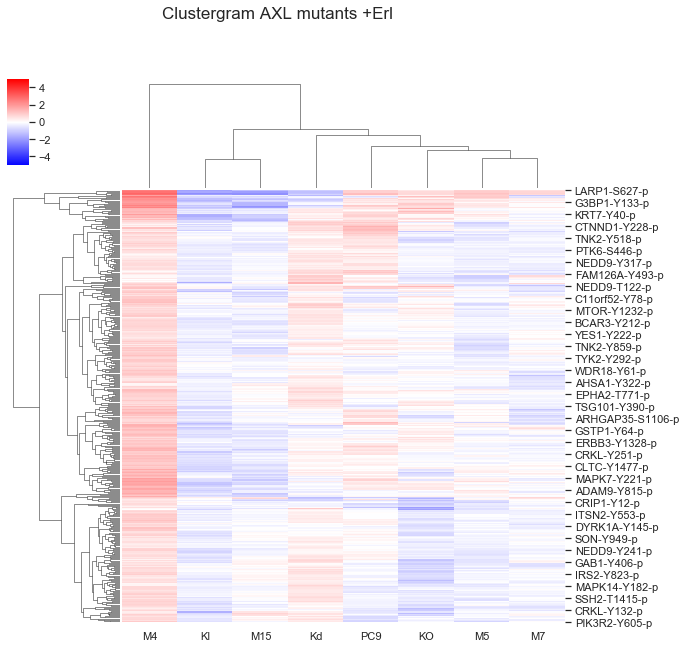

In [15]:
data_mutErl = pd.concat([ABC_mutErl.iloc[:, 3:5], ABC_mutErl.iloc[:, 5:]], axis=1).set_index(["Abbv", "Position"])
plotClustergram(data_mutErl, "Clustergram AXL mutants +Erl", lim=5)

In [16]:
axl = ABC_mutErl[ABC_mutErl["Protein"].str.contains("UFO")]
axl.iloc[:, 5:] = pd.DataFrame(np.power(2, axl.iloc[:, 5:])).div(np.power(2, axl.iloc[:, 5]), axis=0)
axl

Protein     Sequence UniprotAcc Abbv  \
385  Tyrosine-protein kinase receptor UFO  ENSEIyDYLRQ     P30530  AXL   
386  Tyrosine-protein kinase receptor UFO  HPAGRyVLCPS     P30530  AXL   

    Position  PC9        KO        Kd        KI        M4        M5        M7  \
385   Y759-p  1.0  1.034344  0.678141  0.778931  2.784829  1.339176  1.145187   
386   Y866-p  1.0  0.445165  0.571001  1.288497  2.035573  1.318532  1.842683   

          M15  
385  0.859781  
386  2.154898

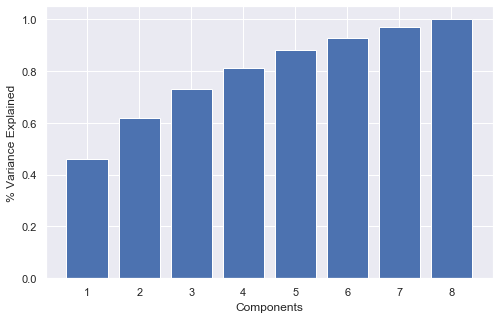

In [17]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, data_mutErl, data_mutErl.shape[1])

In [18]:
plotpca_ScoresLoadings_plotly(data_mutErl.T, "PC9 AXL mutants +Erlotinib", "EGFR")

               PC1       PC2
Position                    
Y1197-p   0.035678  0.054212
Y1172-p   0.042029  0.038445
Y1069-p   0.053583  0.059650


In [19]:
bcar1 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("BCAR1")]
bcar1.iloc[:, 5:] = pd.DataFrame(np.power(2, bcar1.iloc[:, 5:])).div(np.power(2, bcar1.iloc[:, 5]), axis=0)
bcar1

Protein     Sequence UniprotAcc  \
48  Breast cancer anti-estrogen resistance protein 1  AQQGLyQVPGP     P56945   
49  Breast cancer anti-estrogen resistance protein 1  GGVVDsGVYAV     P56945   
50  Breast cancer anti-estrogen resistance protein 1  GPGTLyDVPRE     P56945   
51  Breast cancer anti-estrogen resistance protein 1  GPQDIyDVPPV     P56945   
52  Breast cancer anti-estrogen resistance protein 1  LAKALyDNVAE     P56945   

     Abbv Position  PC9        KO        Kd        KI        M4        M5  \
48  BCAR1   Y128-p  1.0  0.639112  1.008218  0.782599  1.597497  0.635624   
49  BCAR1   S407-p  1.0  0.809606  0.367594  0.287408  2.301026  0.724389   
50  BCAR1   Y387-p  1.0  0.646477  1.507218  1.083599  1.721985  0.751329   
51  BCAR1   Y249-p  1.0  1.695859  1.847276  0.883731  1.909563  0.844361   
52  BCAR1    Y12-p  1.0  1.170697  1.376686  0.913257  1.952158  1.000096   

          M7       M15  
48  0.691717  0.707254  
49  0.550166  0.123476  
50  0.778036  1.037605  
51  1.082215  1.090688  
52  1.104968  1.032002

In [20]:
bcar1 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("BCAR1")]
bcar1.iloc[:, 5:] = pd.DataFrame(np.power(2, bcar1.iloc[:, 5:])).div(np.power(2, bcar1.iloc[:, 5]), axis=0)
bcar1

Protein     Sequence UniprotAcc  \
48  Breast cancer anti-estrogen resistance protein 1  AQQGLyQVPGP     P56945   
49  Breast cancer anti-estrogen resistance protein 1  GGVVDsGVYAV     P56945   
50  Breast cancer anti-estrogen resistance protein 1  GPGTLyDVPRE     P56945   
51  Breast cancer anti-estrogen resistance protein 1  GPQDIyDVPPV     P56945   
52  Breast cancer anti-estrogen resistance protein 1  LAKALyDNVAE     P56945   

     Abbv Position  PC9        KO        Kd        KI        M4        M5  \
48  BCAR1   Y128-p  1.0  0.639112  1.008218  0.782599  1.597497  0.635624   
49  BCAR1   S407-p  1.0  0.809606  0.367594  0.287408  2.301026  0.724389   
50  BCAR1   Y387-p  1.0  0.646477  1.507218  1.083599  1.721985  0.751329   
51  BCAR1   Y249-p  1.0  1.695859  1.847276  0.883731  1.909563  0.844361   
52  BCAR1    Y12-p  1.0  1.170697  1.376686  0.913257  1.952158  1.000096   

          M7       M15  
48  0.691717  0.707254  
49  0.550166  0.123476  
50  0.778036  1.037605  
51  1.082215  1.090688  
52  1.104968  1.032002

In [21]:
bcar1 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("BCAR1")]
bcar1.iloc[:, 5:] = pd.DataFrame(np.power(2, bcar1.iloc[:, 5:])).div(np.power(2, bcar1.iloc[:, 5]), axis=0)
bcar1

Protein     Sequence UniprotAcc  \
48  Breast cancer anti-estrogen resistance protein 1  AQQGLyQVPGP     P56945   
49  Breast cancer anti-estrogen resistance protein 1  GGVVDsGVYAV     P56945   
50  Breast cancer anti-estrogen resistance protein 1  GPGTLyDVPRE     P56945   
51  Breast cancer anti-estrogen resistance protein 1  GPQDIyDVPPV     P56945   
52  Breast cancer anti-estrogen resistance protein 1  LAKALyDNVAE     P56945   

     Abbv Position  PC9        KO        Kd        KI        M4        M5  \
48  BCAR1   Y128-p  1.0  0.639112  1.008218  0.782599  1.597497  0.635624   
49  BCAR1   S407-p  1.0  0.809606  0.367594  0.287408  2.301026  0.724389   
50  BCAR1   Y387-p  1.0  0.646477  1.507218  1.083599  1.721985  0.751329   
51  BCAR1   Y249-p  1.0  1.695859  1.847276  0.883731  1.909563  0.844361   
52  BCAR1    Y12-p  1.0  1.170697  1.376686  0.913257  1.952158  1.000096   

          M7       M15  
48  0.691717  0.707254  
49  0.550166  0.123476  
50  0.778036  1.037605  
51  1.082215  1.090688  
52  1.104968  1.032002

In [22]:
bcar1 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("BCAR1")]
bcar1.iloc[:, 5:] = pd.DataFrame(np.power(2, bcar1.iloc[:, 5:])).div(np.power(2, bcar1.iloc[:, 5]), axis=0)
bcar1

Protein     Sequence UniprotAcc  \
48  Breast cancer anti-estrogen resistance protein 1  AQQGLyQVPGP     P56945   
49  Breast cancer anti-estrogen resistance protein 1  GGVVDsGVYAV     P56945   
50  Breast cancer anti-estrogen resistance protein 1  GPGTLyDVPRE     P56945   
51  Breast cancer anti-estrogen resistance protein 1  GPQDIyDVPPV     P56945   
52  Breast cancer anti-estrogen resistance protein 1  LAKALyDNVAE     P56945   

     Abbv Position  PC9        KO        Kd        KI        M4        M5  \
48  BCAR1   Y128-p  1.0  0.639112  1.008218  0.782599  1.597497  0.635624   
49  BCAR1   S407-p  1.0  0.809606  0.367594  0.287408  2.301026  0.724389   
50  BCAR1   Y387-p  1.0  0.646477  1.507218  1.083599  1.721985  0.751329   
51  BCAR1   Y249-p  1.0  1.695859  1.847276  0.883731  1.909563  0.844361   
52  BCAR1    Y12-p  1.0  1.170697  1.376686  0.913257  1.952158  1.000096   

          M7       M15  
48  0.691717  0.707254  
49  0.550166  0.123476  
50  0.778036  1.037605  
51  1.082215  1.090688  
52  1.104968  1.032002

In [23]:
bcar1 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("BCAR1")]
bcar1.iloc[:, 5:] = pd.DataFrame(np.power(2, bcar1.iloc[:, 5:])).div(np.power(2, bcar1.iloc[:, 5]), axis=0)
bcar1

Protein     Sequence UniprotAcc  \
48  Breast cancer anti-estrogen resistance protein 1  AQQGLyQVPGP     P56945   
49  Breast cancer anti-estrogen resistance protein 1  GGVVDsGVYAV     P56945   
50  Breast cancer anti-estrogen resistance protein 1  GPGTLyDVPRE     P56945   
51  Breast cancer anti-estrogen resistance protein 1  GPQDIyDVPPV     P56945   
52  Breast cancer anti-estrogen resistance protein 1  LAKALyDNVAE     P56945   

     Abbv Position  PC9        KO        Kd        KI        M4        M5  \
48  BCAR1   Y128-p  1.0  0.639112  1.008218  0.782599  1.597497  0.635624   
49  BCAR1   S407-p  1.0  0.809606  0.367594  0.287408  2.301026  0.724389   
50  BCAR1   Y387-p  1.0  0.646477  1.507218  1.083599  1.721985  0.751329   
51  BCAR1   Y249-p  1.0  1.695859  1.847276  0.883731  1.909563  0.844361   
52  BCAR1    Y12-p  1.0  1.170697  1.376686  0.913257  1.952158  1.000096   

          M7       M15  
48  0.691717  0.707254  
49  0.550166  0.123476  
50  0.778036  1.037605  
51  1.082215  1.090688  
52  1.104968  1.032002

In [24]:
bcar1 = ABC_mutErl[ABC_mutErl["Abbv"].str.contains("BCAR1")]
bcar1.iloc[:, 5:] = pd.DataFrame(np.power(2, bcar1.iloc[:, 5:])).div(np.power(2, bcar1.iloc[:, 5]), axis=0)
bcar1

Protein     Sequence UniprotAcc  \
48  Breast cancer anti-estrogen resistance protein 1  AQQGLyQVPGP     P56945   
49  Breast cancer anti-estrogen resistance protein 1  GGVVDsGVYAV     P56945   
50  Breast cancer anti-estrogen resistance protein 1  GPGTLyDVPRE     P56945   
51  Breast cancer anti-estrogen resistance protein 1  GPQDIyDVPPV     P56945   
52  Breast cancer anti-estrogen resistance protein 1  LAKALyDNVAE     P56945   

     Abbv Position  PC9        KO        Kd        KI        M4        M5  \
48  BCAR1   Y128-p  1.0  0.639112  1.008218  0.782599  1.597497  0.635624   
49  BCAR1   S407-p  1.0  0.809606  0.367594  0.287408  2.301026  0.724389   
50  BCAR1   Y387-p  1.0  0.646477  1.507218  1.083599  1.721985  0.751329   
51  BCAR1   Y249-p  1.0  1.695859  1.847276  0.883731  1.909563  0.844361   
52  BCAR1    Y12-p  1.0  1.170697  1.376686  0.913257  1.952158  1.000096   

          M7       M15  
48  0.691717  0.707254  
49  0.550166  0.123476  
50  0.778036  1.037605  
51  1.082215  1.090688  
52  1.104968  1.032002

### C) PC9 AXL MUTANTS TREATED WITH ERLOTINIB AND F154

In [25]:
ABC_mutF154 = preprocessing(Axlmuts_ErlF154=True, motifs=True, Vfilter=False, FCfilter=False, log2T=True, mc_row=True)

In [26]:
axl = ABC_mutF154[ABC_mutF154["Abbv"].str.contains("AXL")]
axl.iloc[:, 5:] = pd.DataFrame(np.power(2, axl.iloc[:, 5:]))
axl

Protein     Sequence UniprotAcc Abbv  \
371  Tyrosine-protein kinase receptor UFO  ENSEIyDYLRQ     P30530  AXL   
372  Tyrosine-protein kinase receptor UFO  HPAGRyVLCPS     P30530  AXL   
373  Tyrosine-protein kinase receptor UFO  IYNGDyYRQGR     P30530  AXL   

    Position     PC9 A      KO A      Kd A      KI A      M4 A      M5 A  \
371   Y759-p  0.776403  0.571202  0.488975  1.092877  1.185361  1.279310   
372   Y866-p  1.394907  0.254523  0.463483  0.750987  1.109877  1.065548   
373   Y702-p  1.172662  0.144163  0.128262  1.339313  1.162014  3.168843   

         M7 A     M10 A     M11 A     M15 A  
371  1.349424  2.046780  0.649722  1.550571  
372  1.537679  1.328558  1.847505  1.812937  
373  0.402526  2.243775  3.268276  3.168024

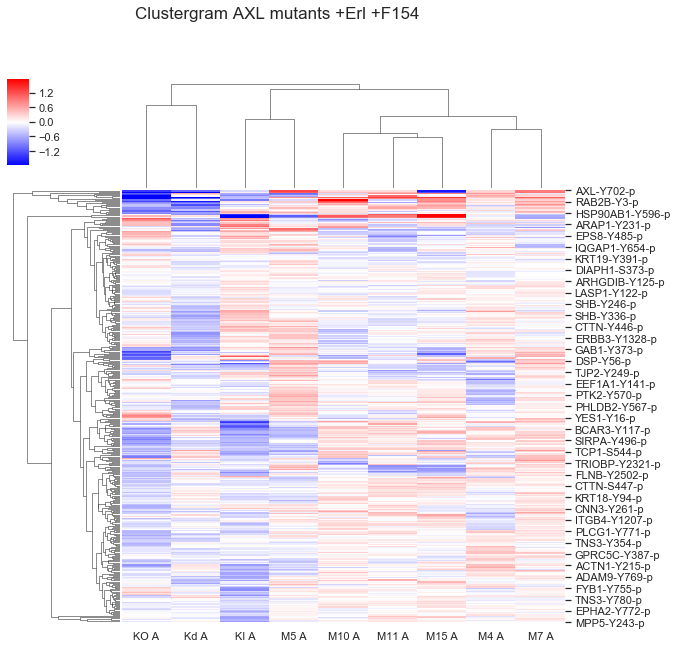

In [27]:
data_mutF154 = pd.concat([ABC_mutF154.iloc[:, 3:5], ABC_mutF154.iloc[:, 6:]], axis=1).set_index(["Abbv", "Position"])
plotClustergram(data_mutF154, "Clustergram AXL mutants +Erl +F154",  max(np.max(np.abs(data_mutF154)) * 0.6))

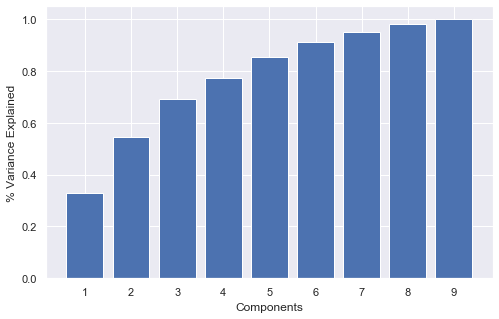

In [28]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, data_mutF154, data_mutF154.shape[1])

In [29]:
plotpca_ScoresLoadings_plotly(data_mutF154.T, "PC9 +Erl +F154", "GSK3A")

               PC1       PC2
Position                    
Y279-p    0.143732 -0.100897
S278-p   -0.032353  0.030760


### D) CONCATENATING BOTH AXL MUTANT DATA SETS AND SETTING FOLD CHANGE TO PC9 + ERLOTINIB

In [30]:
ABC_mutErl_raw = pd.read_csv("./msresist/data/Raw/PC9_mutants_unstim_BR1_raw.csv")
ABC_mutF154_raw = pd.read_csv("./msresist/data/Raw/PC9_mutants_ActivatingAb_BR1_raw.csv")

In [31]:
from msresist.sequence_analysis import FormatName

ln, sn = FormatName(ABC_mutErl_raw)
ABC_mutErl_raw["Protein"] = ln
ABC_mutErl_raw = ABC_mutErl_raw.assign(Abbv=sn)

ln, sn = FormatName(ABC_mutF154_raw)
ABC_mutF154_raw["Protein"] = ln
ABC_mutF154_raw = ABC_mutF154_raw.assign(Abbv=sn)

In [32]:
from msresist.pre_processing import MapOverlappingPeptides

ABC_mutF154_raw.columns = ABC_mutErl_raw.columns

_, overlap, _ = MapOverlappingPeptides(pd.concat([ABC_mutF154_raw, ABC_mutErl_raw]))

In [33]:
ABC_mutErl = ABC_mutErl_raw.set_index(["Protein", "Sequence"])
ABC_mutF154 = ABC_mutF154_raw.set_index(["Protein", "Sequence"])

prots = list(overlap.iloc[:, 0])
seqs = list(overlap.iloc[:, 1])

ERL, F154 = [], []
for i in range(overlap.shape[0]):
    ERL.append(ABC_mutErl.loc[prots[i], seqs[i]])
    F154.append(ABC_mutF154.loc[prots[i], seqs[i]])

ERL = pd.DataFrame(ERL).reset_index()
F154 = pd.DataFrame(F154).reset_index().iloc[:, 1:]

In [34]:
ABC_mutF154.columns = list(ABC_mutF154.columns[:1]) + [col + str(" + F154") for col in list(ABC_mutF154.columns)[1:]]
F154.columns = ABC_mutF154.columns

In [35]:
conc = pd.concat([ERL, F154.iloc[:, 1:10]], axis=1).set_index("Abbv").iloc[:, 2:]
conc = np.log(conc.div(conc.iloc[:, 0], axis=0))

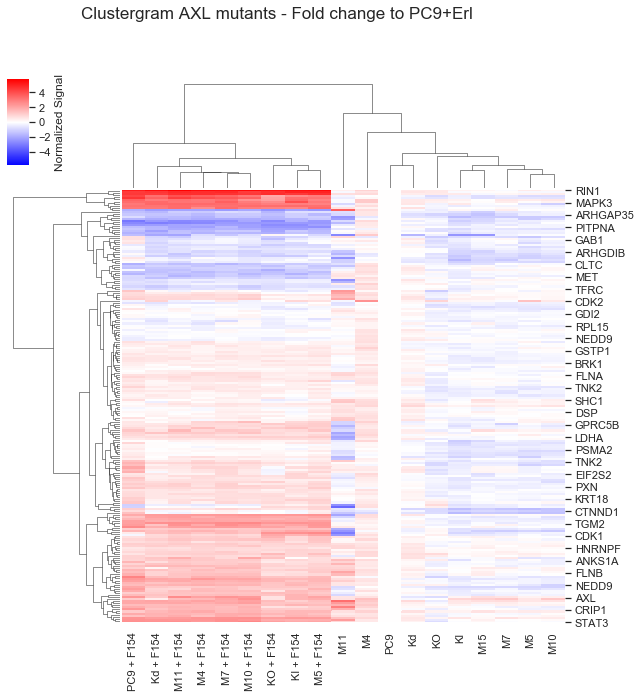

In [36]:
import seaborn as sns

g = sns.clustermap(conc, method="complete", robust=True, vmax=max(np.max(np.abs(conc))), vmin=-max(np.max(np.abs(conc))), cmap="bwr", col_cluster=True, cbar_kws={"label":"Normalized Signal"})
g.fig.suptitle( "Clustergram AXL mutants - Fold change to PC9+Erl", fontsize=17)
ax = g.ax_heatmap
ax.set_ylabel("");

## 2. Cell Viability Measurements:

Average between two replicates. Fold-change 72h vs 0h.

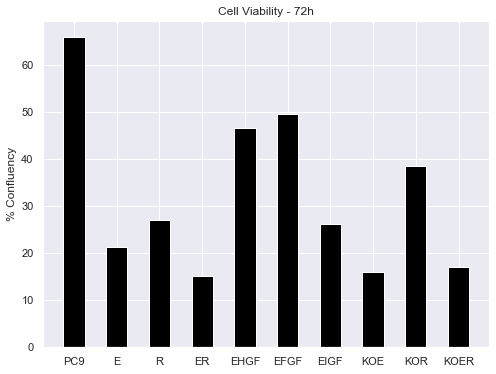

In [37]:
Y_cv1 = pd.read_csv('./msresist/data/Phenotypic_data/CV_raw3.csv').iloc[:30, :11]
Y_cv2 = pd.read_csv('./msresist/data/Phenotypic_data/CV_raw4.csv').iloc[:29, :11]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
plotAveragedEndpoint(ax, Y_cv1, Y_cv2)

Raw Measurements of both replicates. Initial seeding was clearly off in Exp4.

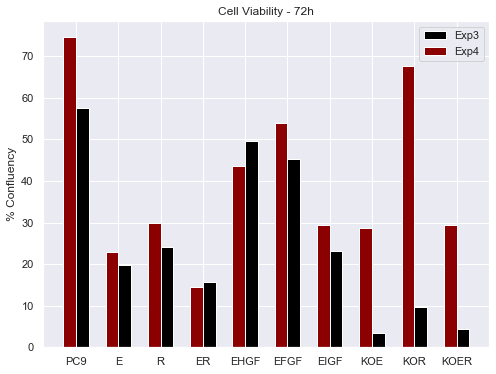

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plotReplicatesEndpoint(ax, Y_cv1, Y_cv2)

However, by fold-changing to t=0h, both replicates are notably reproducible:

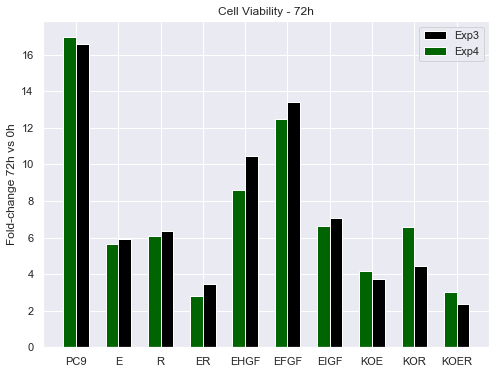

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plotReplicatesFoldChangeEndpoint(ax, Y_cv1, Y_cv2)

## Cell Viability levels of RIPK1-Transfected PC9 cells

In [40]:
Time = pd.read_csv('./msresist/data/Phenotypic_data/RIPK1_CV_PC9_samples_raw_byRow.csv', delimiter='\t').iloc[:, 1]
full = pd.read_csv('./msresist/data/Phenotypic_data/RIPK1_CV_PC9_samples_raw_byRow.csv', delimiter='\t').iloc[:, 2:]

In [41]:
avg_full = np.zeros((20, 24))
for i in range(full.shape[0]):
    for j in range(int(full.shape[1]/3)):
        avg_full[i, j] = full.iloc[i, j*3:(j+1)*3].mean()
        
avg_full = pd.DataFrame(avg_full)

In [42]:
full = pd.concat([Time, avg_full], axis=1)
full.columns = ["Elapsed", ".8_wt+fbs", ".8_wt-fbs", ".8_YF+fbs", ".8_YF-fbs", 
                "1_wt+fbs", "1_wt-fbs", "1_YF+fbs", "1_YF-fbs",
                "1.3_wt+fbs", "1.3_wt-fbs","1.3_YF+fbs", "1.3_YF-fbs",
                "1.5_wt+fbs", "1.5_wt-fbs","1.5_YF+fbs", "1.5_YF-fbs",
                "2_wt+fbs", "2_wt-fbs","2_YF+fbs", "2_YF-fbs",
                "3_wt+fbs", "3_wt-fbs", "3_YF+fbs", "3_YF-fbs"]

full = full.set_index("Elapsed")

In [43]:
Xidx = [i for i in range(0,24,2)]
full = full.iloc[:, Xidx]

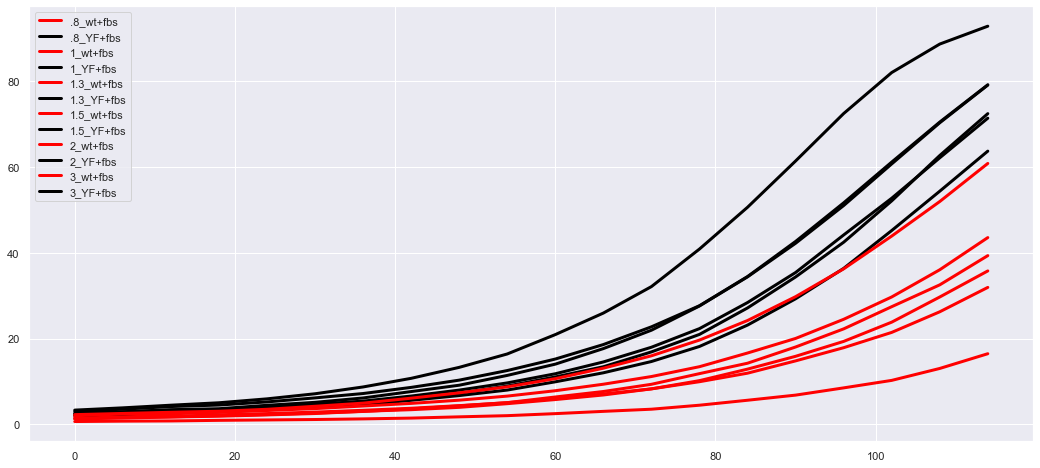

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

for i in range(12):
    if i in [j for j in range(0, 12, 2)]:
        ax.plot(full.iloc[:, i], label=full.columns[i], linewidth=3, color="red")
    else:
        ax.plot(full.iloc[:, i], label=full.columns[i], linewidth=3, color="black")

ax.legend(loc=2);

In [45]:
full = full.reset_index()

In [46]:
import scipy as sp

Y_cv0 = full[full["Elapsed"] == 0].iloc[0, 1:]
Y_fc108 = full[full["Elapsed"] == 108].iloc[0, 1:] / Y_cv0

print(sp.stats.pearsonr(Y_cv0, Y_fc108)[1])
assert sp.stats.pearsonr(Y_cv0, Y_fc108)[1] > 0.05, "cell seeding effect"

for ii in range(1, full.columns.size):
    full.iloc[:, ii] /= full.iloc[0, ii]

0.14426943843606974


In [47]:
full = full.set_index("Elapsed")

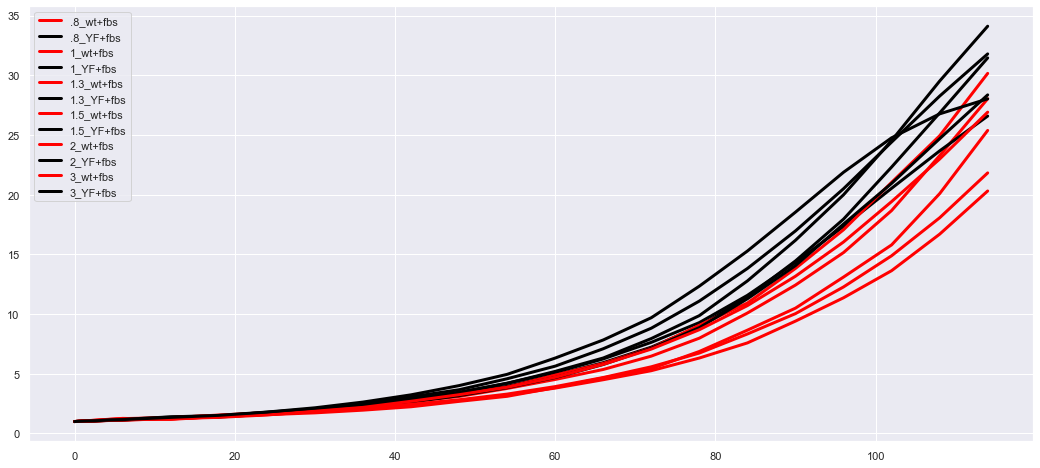

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

for i in range(12):
    if i in [j for j in range(0, 12, 2)]:
        ax.plot(full.iloc[:, i], label=full.columns[i], linewidth=3, color="red")
    else:
        ax.plot(full.iloc[:, i], label=full.columns[i], linewidth=3, color="black")

ax.legend(loc=2)

In [49]:
full = full.reset_index()

Text(0, 0.5, 'fold-change confluency')

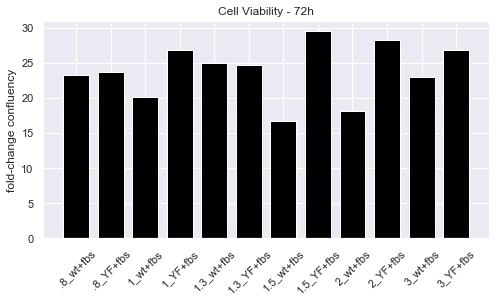

In [50]:
fig, ax = plt.subplots(1, figsize=(8,4))

range_ = np.linspace(1, 12, 12)

ax.set_title("Cell Viability - 72h")
ax.set_xticks(np.arange(1, 13, 1))
ax.set_xticklabels(full.columns[1:], rotation=45)
ax.bar(range_, full[full["Elapsed"] == 108].iloc[0, 1:], width=0.75, align='center', color="black")
ax.set_ylabel("fold-change confluency")